### Use this for plotting using just the default AGN

In [35]:
import data_manipulation as data
import results_plot as plot
import results_plot_modified as plot2
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
path = 'AGN_0713'
path2 =  path + '/Cloudy_sims'
name_xi1 = 'AGN_gen_xi1'
name_xi2 = 'AGN_gen_xi2'
name_xi3 = 'AGN_gen_xi3'
name_xi4 = 'AGN_gen_xi4'

In [14]:
xi_stepsize = 0.2
hden_stepsize = 0.1
xi = data.logspace(-1, 6, xi_stepsize)
hden = data.logspace(-1, 15, hden_stepsize)

xi_lin = data.linspace(-1, 6, xi_stepsize)
hden_lin = data.linspace(-1, 15, hden_stepsize)

xi_split = np.array_split(xi_lin, 4)

In [5]:
hden_concat = []
#print(np.append(hden_lin, hden_lin))
for i in range(2):
    hden_concat = np.append(hden_concat, hden)

In [9]:
with open('GenAGN_ratio/temperature_arr.npy', 'rb') as f:
    avg_temp_split_list = np.load(f)

In [11]:
with open('GenAGN_ratio/T_ratio.npy', 'rb') as f:
    T_ratio = np.load(f)

In [33]:
with open('GenAGN_ratio/temperature_arr.npy', 'rb') as f:
    print(np.load(f))

[[5.102914e+03 5.099918e+03 5.100153e+03 ... 2.736045e+04 2.854244e+04
  2.981353e+04]
 [5.488393e+03 5.488523e+03 5.488496e+03 ... 3.234159e+04 3.390542e+04
  3.559873e+04]
 [9.911563e+03 9.911084e+03 9.909583e+03 ... 3.826669e+04 4.007388e+04
  4.192069e+04]
 ...
 [8.621212e+06 8.621212e+06 8.621212e+06 ... 1.000000e-30 1.000000e-30
  1.000000e-30]
 [8.672584e+06 8.672584e+06 8.672584e+06 ... 1.000000e-30 1.000000e-30
  1.000000e-30]
 [8.705201e+06 8.705201e+06 8.705201e+06 ... 1.000000e-30 1.000000e-30
  1.000000e-30]]


In [ ]:
with open('GenAGN_ratio/T_ratio.npy', 'wb') as f:
    np.save(f, T_ratio)
    
with open('GenAGN_ratio/hden_ratio.npy', 'wb') as f:
    np.save(f, hden_ratio)

with open('GenAGN_ratio/xi.npy', 'wb') as f:
    np.save(f, xi)
    np.save(f, xi_lin)

In [34]:
with open('GenAGN_ratio/temperature_arr.npy', 'rb') as f:
    avg_temp_2darr = np.load(f)
    
with open('GenAGN_ratio/avg_temp_final.npy', 'rb') as f:
    avg_temp_split = np.load(f)
    
with open('GenAGN_ratio/transition.npy', 'rb') as f:
    n_transition = np.load(f)
    te_transition = np.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'GenAGN_ratio/avg_temp_final.npy'

In [6]:
listOfLists_depth1, listOfLists_Te1 = data.temp_txt(path, name_xi1)
avg_temp_split1 = data.avg_temp_txt(path, name_xi1, xi_split[0])

In [7]:
listOfLists_depth1, listOfLists_Te1 = data.temp_txt(path, name_xi1)
avg_temp_split1 = data.avg_temp_txt(path, name_xi1, xi_split[0])

listOfLists_depth2, listOfLists_Te2 = data.temp_txt(path, name_xi2)
avg_temp_split2 = data.avg_temp_txt(path, name_xi2, xi_split[1])

listOfLists_depth3, listOfLists_Te3 = data.temp_txt(path2, name_xi3)
avg_temp_split3 = data.avg_temp_txt(path2, name_xi3, xi_split[2])

listOfLists_depth4, listOfLists_Te4 = data.temp_txt(path2, name_xi4)
avg_temp_split4 = data.avg_temp_txt(path2, name_xi4, xi_split[3])

In [8]:
avg_temp_split = []
avg_temp_split.append(list(avg_temp_split1))
avg_temp_split.append(list(avg_temp_split2))
avg_temp_split.append(list(avg_temp_split3))
avg_temp_split.append(list(avg_temp_split4))

In [9]:
avg_temp_split_list = []
# Combine average temperature arrays for each xi intervals into one
for i in range(9): # xi run1
    avg_temp_split_list.append(avg_temp_split1[i])
for i in range(9): # xi run2
    avg_temp_split_list.append(avg_temp_split2[i])
for i in range(9): # xi run3
    avg_temp_split_list.append(avg_temp_split3[i])
for i in range(9): # xi run4
    avg_temp_split_list.append(avg_temp_split4[i])

In [10]:
n_transition, te_transition = data.temp_ratio(hden, np.array(avg_temp_split_list))

In [11]:
n_transition2, te_transition2 = data.temp_ratio(hden_lin, np.array(avg_temp_split_list))

In [ ]:
with open('Mrk509_arrays/transition.npy', 'wb') as f:
    np.save(f, n_transition_all)
    np.save(f, n_transition_med)    
    np.save(f, n_transition_noIR)
    np.save(f, n_transition_stacked)
    np.save(f, te_transition_all)
    np.save(f, te_transition_med)    
    np.save(f, te_transition_noIR)
    np.save(f, Te_transition_stacked)

In [13]:
def temp_ratio(hden, avg_temp_split):
    n_transition, te_transition = np.array([]), np.array([])
    for index in range(len(avg_temp_split)):
        for i in range(0, len(avg_temp_split[0])-1):
        # i += 1
            if avg_temp_split[index][i + 1] / avg_temp_split[index][i] * 100 >= 110.0:
                n_transition = np.append(n_transition, hden[i])
                te_transition = np.append(te_transition, avg_temp_split[index][i])
                break
    return n_transition, te_transition

In [324]:
n_transition, te_transition = np.array([]), np.array([])
for index in range(0, len(avg_temp_split_list)):
    try:
        i = 0
        while True:
            i += 1
            if avg_temp_split_list[index][i+1]/avg_temp_split_list[index][i] >= 1.1:
                n_transition = np.append(n_transition, hden[i])
                te_transition = np.append(te_transition, avg_temp_split_list[index][i])
                break
    except IndexError:
        print(avg_temp_split_list[index][i], index, i)

35598.73 1 160
41920.69 2 160
48441.74 3 160
57331.81 4 160
68385.24 5 160
82516.38 6 160
103108.2 7 160
137657.6 8 160
195720.1 9 160


In [325]:
len(n_transition)

27

In [312]:
xi_lin

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,
        1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,
        3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4,
        5.6,  5.8,  6. ])

In [337]:
colors[1]

array([0.44509804, 0.08613294, 0.99907048, 1.        ])

In [ ]:
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 

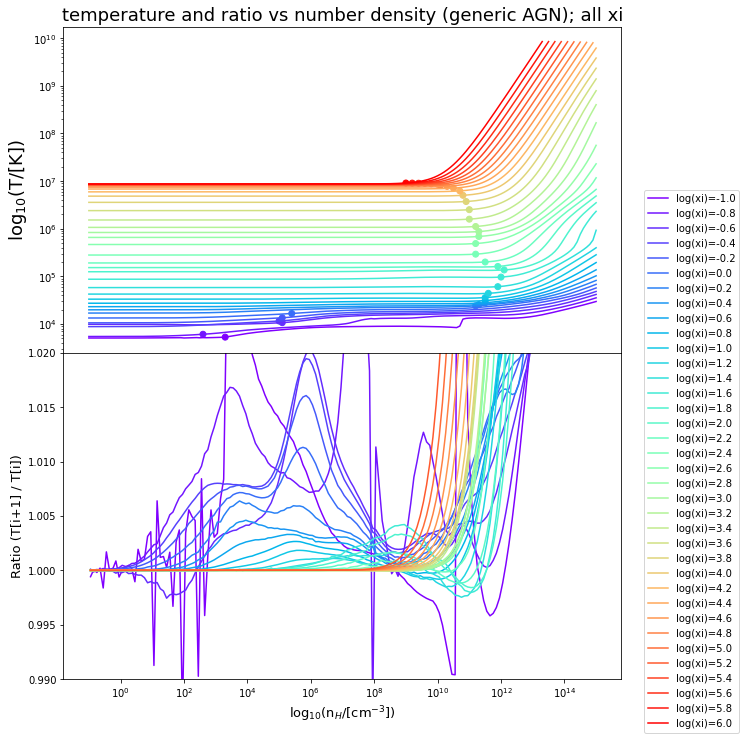

In [20]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
fig.subplots_adjust(hspace=0)
axs[0].set_title("temperature and ratio vs number density (generic AGN); all xi", fontsize=18)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=13)
axs[0].set_ylabel(r'log$_{10}$(T/[K])', fontsize=18)
#axs[0].set_xscale("log")
axs[0].set_yscale("log")
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(0, len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if len(index) == len(row):
        #print("List is not empty")
        axs[0].plot(hden, row, color=colors[i], label= 'log(xi)='  + str("%.1f" % xi_lin[i] ))
    else:
        #print(index)
        pass
        axs[0].plot(hden[index], row[index], color=colors[i], label= 'log(xi)=' +str("%.1f" % xi_lin[i]))  
#axs[0].scatter(n_transition[10:-1],te_transition[10:-1], color=colors[10:-1])
axs[0].scatter(n_transition,te_transition, color=colors)    
axs[0].legend(bbox_to_anchor=(1.04, 0.5), loc="upper left", borderaxespad=0)

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

axs[1].set_xscale("log")
axs[1].set_ylim(0.99, 1.02)
axs[1].set_ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 0
while i <= (len(xi)-increment):
#for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        axs[1].plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])#,
     #       label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",
   #     )
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        axs[1].plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])#,
       #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

    i += 1
#axs[1].plot(hden_ratio, T_ratio[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   

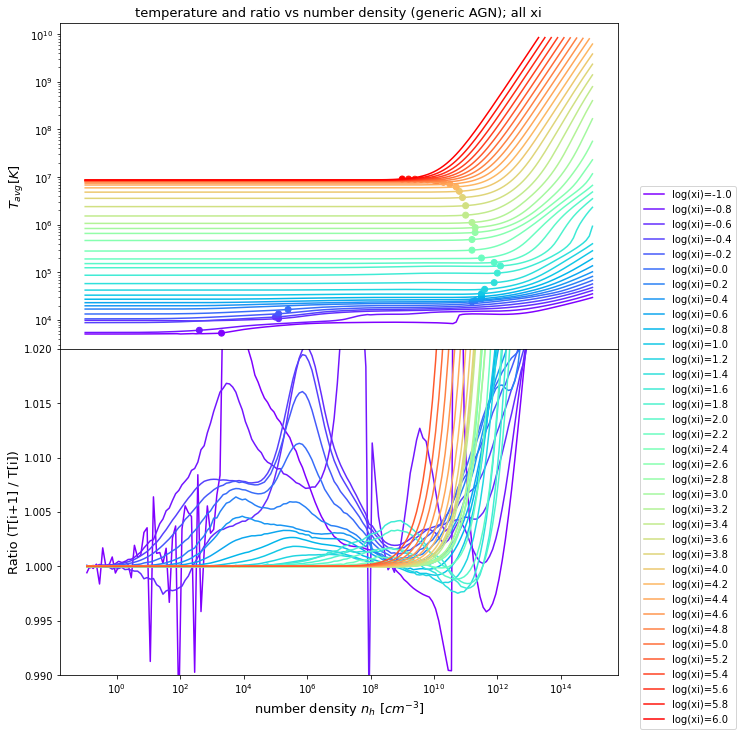

In [21]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
fig.subplots_adjust(hspace=0)
axs[0].set_title("temperature and ratio vs number density (generic AGN); all xi", fontsize=13)
plt.xlabel("number density $n_h$ [$cm^{-3}$]", fontsize=13)
axs[0].set_ylabel("$T_{avg} [K]$", fontsize=13)
#axs[0].set_xscale("log")
axs[0].set_yscale("log")
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(0, len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if len(index) == len(row):
        #print("List is not empty")
        axs[0].plot(hden, row, color=colors[i], label= 'log(xi)='  + str("%.1f" % xi_lin[i] ))
    else:
        #print(index)
        pass
        axs[0].plot(hden[index], row[index], color=colors[i], label= 'log(xi)=' +str("%.1f" % xi_lin[i]))  
#axs[0].scatter(n_transition[10:-1],te_transition[10:-1], color=colors[10:-1])
axs[0].scatter(n_transition,te_transition, color=colors)    
axs[0].legend(bbox_to_anchor=(1.04, 0.5), loc="upper left", borderaxespad=0)

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

axs[1].set_xscale("log")
axs[1].set_ylim(0.99, 1.02)
axs[1].set_ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 0
while i <= (len(xi)-increment):
#for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        axs[1].plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])#,
     #       label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",
   #     )
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        axs[1].plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])#,
       #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

    i += 1
#axs[1].plot(hden_ratio, T_ratio[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   

In [37]:
# avg_temp_2d
avg_temp_2darr = data.avg_temp_2d(hden, avg_temp_split_list)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


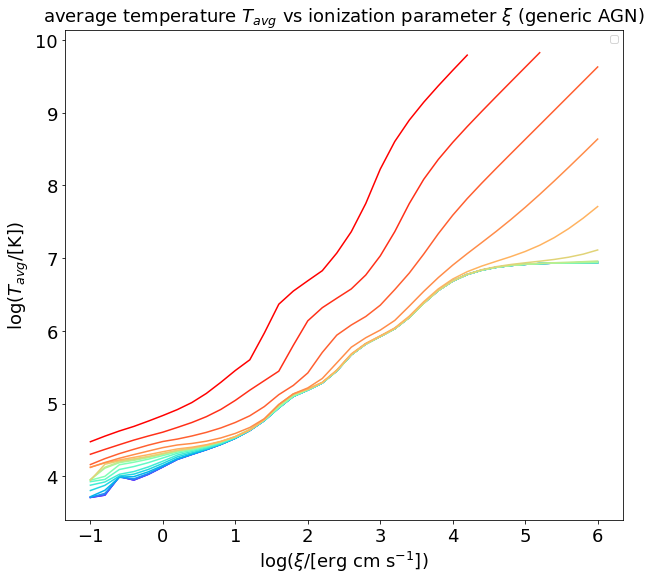

In [38]:
prefix = 'generic AGN'

fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temperature $T_{avg} $ vs ionization parameter $\\xi$ (" + str(prefix) + ")",
    fontsize=18,
)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
#plt.xlabel("ionization parameter $\\xi$", fontsize=18)
plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
#plt.ylabel("$T_{avg} [K]$", fontsize=13)
plt.ylabel(r'log($T_{avg} $/[K])', fontsize=18)
#plt.xscale("log")
#plt.yscale("log")  
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr)))

i = 0
#for i in range(len(hden)):

#, label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]))
while i <= len(hden):
    row = np.array(avg_temp_2darr[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin, np.log10(row), color=colors[i])#, label="n_h=10^" + str(hden_lin[i]) + ' (all)')
    else:
        pass
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin[0:end],
            np.log10(row)[0:end],
            color=colors[i],
            #label="n_h=10^" + str(hden_lin[i]) + ' (all)',
        ) 
    i += 10  
plt.legend()

In [36]:
prefix  = 'generic AGN'

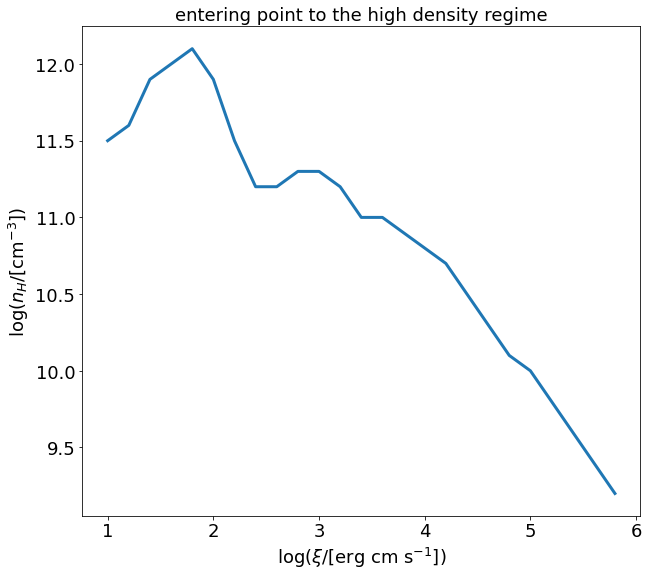

In [37]:
fig, ax = plt.subplots(figsize=(10, 9))
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
plt.title('entering point to the high density regime', fontsize=18)
plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
plt.ylabel('log($n_H$/[cm$^{-3}$])', fontsize=18)
#plt.xscale('log')
#plt.yscale('log')
plt.plot(xi_lin[10:-1], n_transition2[10:-1], linewidth=3)

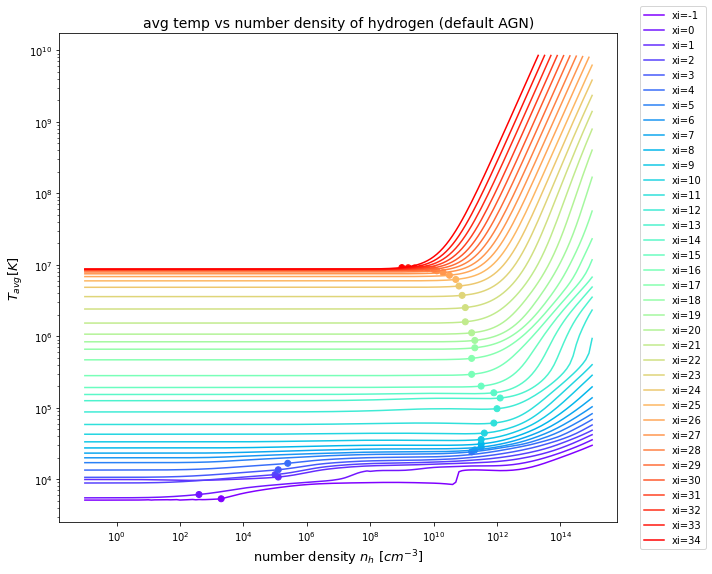

In [38]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title('avg temp vs number density of hydrogen (default AGN)', fontsize=14)
plt.xlabel('number density $n_h$ [$cm^{-3}$]', fontsize=13)
plt.ylabel('$T_{avg} [K]$', fontsize=13)
plt.xscale('log')
plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if len(index) == len(row):
        #print("List is not empty")
        plt.plot(hden, row, color=colors[i], label= 'xi='  + str(i-1))
    else:
        #print(index)
        pass
        plt.plot(hden[index], row[index], color=colors[i], label= 'xi=' + str(i-1))

plt.scatter(n_transition,te_transition, color=colors)    
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

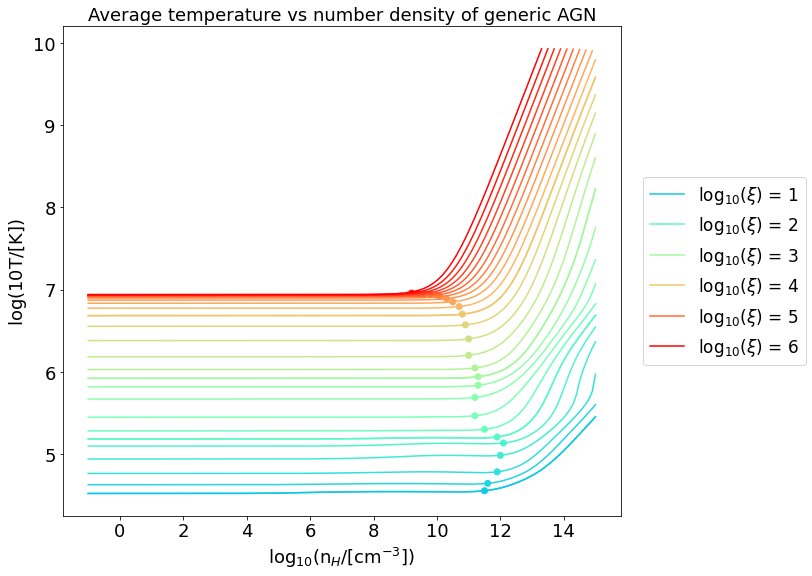

In [39]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Average temperature vs number density of generic AGN", fontsize=18)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log(${10}$T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18)
#plt.xscale('log')
#plt.yscale('log')
plt.plot(np.log10(hden), np.log10(np.array(avg_temp_split_list[10])), color=colors[10], label=r'log$_{10}$($\xi$) = 1')
plt.plot(np.log10(hden), np.log10(np.array(avg_temp_split_list[15])), color=colors[15], label=r'log$_{10}$($\xi$) = 2')
plt.plot(np.log10(hden), np.log10(np.array(avg_temp_split_list[20])), color=colors[20], label=r'log$_{10}$($\xi$) = 3')
plt.plot(np.log10(hden), np.log10(np.array(avg_temp_split_list[25])), color=colors[25], label=r'log$_{10}$($\xi$) = 4')
plt.plot(np.log10(hden[0:100]), np.log10(np.array(avg_temp_split_list[30][0:100])), color=colors[30], label=r'log$_{10}$($\xi$) = 5')
plt.plot(np.log10(hden[0:100]), np.log10(np.array(avg_temp_split_list[-1][0:100])), color=colors[-1], label=r'log$_{10}$($\xi$) = 6')
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(10, len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if len(index) == len(row):
        #print("List is not empty")
        plt.plot(np.log10(hden), np.log10(row), color=colors[i])#, label= 'xi='  + str(i-1))
    else:
        #print(index)
        pass
        plt.plot(np.log10(hden)[index], np.log10(row)[index], color=colors[i])#, label= 'xi=' + str(i-1))

plt.scatter(np.log10(n_transition[10:-1]), np.log10(te_transition[10:-1]), color=colors[10:-1])    
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, fontsize=17)

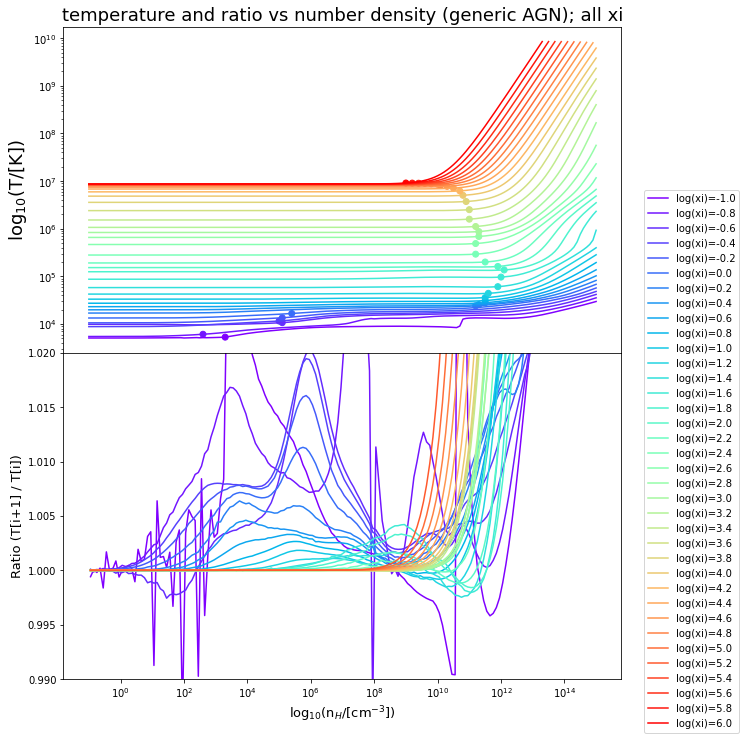

In [40]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
fig.subplots_adjust(hspace=0)
axs[0].set_title("temperature and ratio vs number density (generic AGN); all xi", fontsize=18)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=13)
axs[0].set_ylabel(r'log$_{10}$(T/[K])', fontsize=18)
#axs[0].set_xscale("log")
axs[0].set_yscale("log")
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(0, len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if len(index) == len(row):
        #print("List is not empty")
        axs[0].plot(hden, row, color=colors[i], label= 'log(xi)='  + str("%.1f" % xi_lin[i] ))
    else:
        #print(index)
        pass
        axs[0].plot(hden[index], row[index], color=colors[i], label= 'log(xi)=' +str("%.1f" % xi_lin[i]))  
#axs[0].scatter(n_transition[10:-1],te_transition[10:-1], color=colors[10:-1])
axs[0].scatter(n_transition,te_transition, color=colors)    
axs[0].legend(bbox_to_anchor=(1.04, 0.5), loc="upper left", borderaxespad=0)

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

axs[1].set_xscale("log")
axs[1].set_ylim(0.99, 1.02)
axs[1].set_ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 0
while i <= (len(xi)-increment):
#for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        axs[1].plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])#,
     #       label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",
   #     )
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        axs[1].plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])#,
       #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

    i += 1
#axs[1].plot(hden_ratio, T_ratio[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   

In [46]:
T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

axs[1].set_xscale("log")
axs[1].set_ylim(0.95, 1.02)
axs[1].set_ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 11
while i <= (len(xi)-increment):
#for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        axs[1].plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])#,
     #       label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",
   #     )
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        axs[1].plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])#,
       #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

    i += 1
axs[1].plot(hden_ratio, T_ratio[0], color=colors[0])#, label= ' (' + str(name_index[0]) + ')')  
plt.show()

NameError: name 'name_index' is not defined

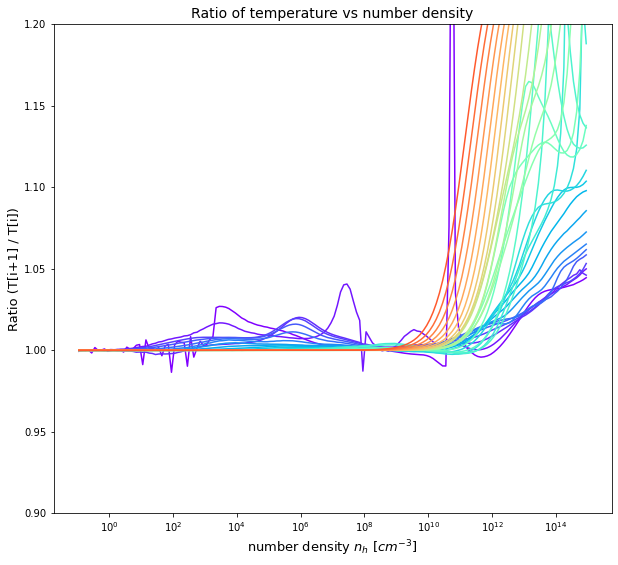

In [47]:
T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Ratio of temperature vs number density", fontsize=14)
plt.xlabel("number density $n_h$ [$cm^{-3}$]", fontsize=13)
plt.ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
plt.xscale("log")
plt.ylim(0.9, 1.2)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 0
while i <= (len(xi)-increment):
#for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        plt.plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])#,
     #       label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",
   #     )
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        plt.plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])#,
       #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

    i += 1
plt.plot(hden_ratio, T_ratio[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

In [50]:
def TempRatio_vs_n(hden, xi, xi_lin, avg_temp_split, name_index):
    T_ratio = np.exp(np.diff(np.log(avg_temp_split)))
    hden_ratio = (hden[1:] + hden[:-1]) / 2

    fig, ax = plt.subplots(figsize=(10, 9))
    plt.title("Ratio of temperature vs number density", fontsize=14)
    plt.xlabel("number density $n_h$ [$cm^{-3}$]", fontsize=13)
    plt.ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
    plt.xscale("log")
    plt.ylim(0.9, 1.2)
    # plt.yscale('log')
    colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
    xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
    increment = int(1/xi_stepsize)
    i = 0
    while i <= (len(xi)-increment):
    #for i in range(len(T_ratio)):
        (ratio_i,) = np.where(T_ratio[i] > 1e-39)
        if len(ratio_i) == len(T_ratio[i]):
            plt.plot(
                hden_ratio,
                T_ratio[i],
                color=colors[i])#,
         #       label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",
       #     )
        else:
            (else_i,) = np.where(T_ratio[i] < 1e-39)
            plt.plot(
                hden_ratio[0 : else_i[0]],
                T_ratio[i][0 : else_i[0]],
                color=colors[i])#,
           #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

        i += 1
    plt.plot(hden_ratio, T_ratio[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    return ax

In [63]:
with open('gen_AGN_arrays/avg_temp_2darr.npy', 'wb') as f:
    np.save(f, avg_temp_2darr)
    
with open('gen_AGN_arrays/avg_temp_final.npy', 'wb') as f:
    np.save(f, avg_temp_split)
    
with open('gen_AGN_arrays/transition.npy', 'wb') as f:
    np.save(f, n_transition)
    np.save(f, te_transition)

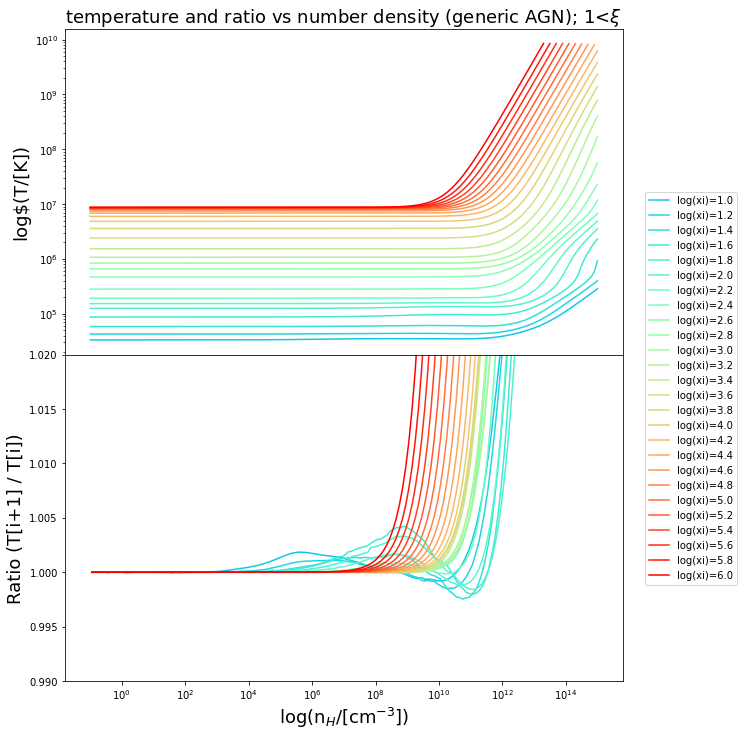

In [24]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
fig.subplots_adjust(hspace=0)
axs[0].set_title("temperature and ratio vs number density (generic AGN); 1<$\\xi$", fontsize=18)
plt.xlabel(r'log(n$_H$/[cm$^{-3}$])', fontsize=18)
axs[0].set_ylabel(r'log$(T/[K])', fontsize=18)
#axs[0].set_xscale("log")
axs[0].set_yscale("log")
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(10, len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if len(index) == len(row):
        #print("List is not empty")
        axs[0].plot(hden, row, color=colors[i], label= 'log(xi)='  + str("%.1f" % xi_lin[i] ))
    else:
        axs[0].plot(hden[index], row[index], color=colors[i], label= 'log(xi)=' +str("%.1f" % xi_lin[i]))  
#axs[0].scatter(n_transition[10:-1],te_transition[10:-1], color=colors[10:-1])
#axs[0].scatter(n_transition,te_transition, color=colors)    
axs[0].legend(bbox_to_anchor=(1.04, 0.5), loc="upper left", borderaxespad=0)

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

axs[1].set_xscale("log")
axs[1].set_ylim(0.99, 1.02)
axs[1].set_ylabel("Ratio (T[i+1] / T[i])", fontsize=18)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
i = 10
while i <= (len(xi)-1):
#for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        axs[1].plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])#,
     #       label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",
   #     )
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        axs[1].plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])#,
       #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

    i += 1
#axs[1].plot(hden_ratio, T_ratio[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   

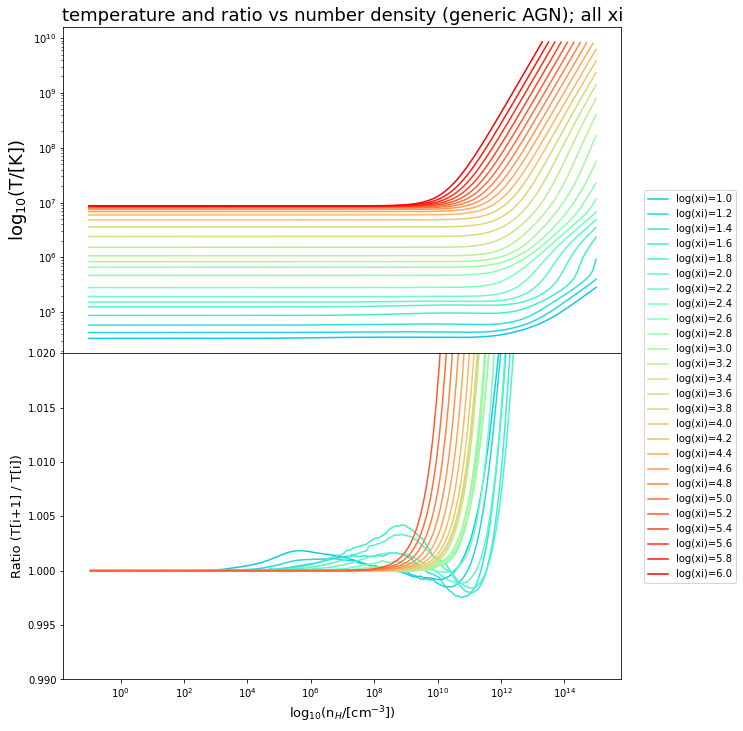

In [87]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
fig.subplots_adjust(hspace=0)
axs[0].set_title("temperature and ratio vs number density (generic AGN); all xi", fontsize=18)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=13)
axs[0].set_ylabel(r'log$_{10}$(T/[K])', fontsize=18)
#axs[0].set_xscale("log")
axs[0].set_yscale("log")
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(10, len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if len(index) == len(row):
        #print("List is not empty")
        axs[0].plot(hden, row, color=colors[i], label= 'log(xi)='  + str("%.1f" % xi_lin[i] ))
    else:
        axs[0].plot(hden[index], row[index], color=colors[i], label= 'log(xi)=' +str("%.1f" % xi_lin[i]))  
#axs[0].scatter(n_transition[10:-1],te_transition[10:-1], color=colors[10:-1])
#axs[0].scatter(n_transition,te_transition, color=colors)    
axs[0].legend(bbox_to_anchor=(1.04, 0.5), loc="upper left", borderaxespad=0)

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

axs[1].set_xscale("log")
axs[1].set_ylim(0.99, 1.02)
axs[1].set_ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 10
while i <= (len(xi)-increment):
#for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        axs[1].plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])#,
     #       label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",
   #     )
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        axs[1].plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])#,
       #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

    i += 1
#axs[1].plot(hden_ratio, T_ratio[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   

In [19]:
with open('GenAGN_ratio/hden_arr.npy', 'wb') as f:
    np.save(f, hden)
    np.save(f, hden_lin)
    

In [315]:
with open('GenAGN_ratio/T_ratio.npy', 'wb') as f:
    np.save(f, T_ratio)
    
with open('GenAGN_ratio/hden_ratio.npy', 'wb') as f:
    np.save(f, hden_ratio)

with open('GenAGN_ratio/xi.npy', 'wb') as f:
    np.save(f, xi)
    np.save(f, xi_lin)

In [331]:
with open('GenAGN_ratio/temperature_arr.npy', 'wb') as f:
    np.save(f, avg_temp_split_list)

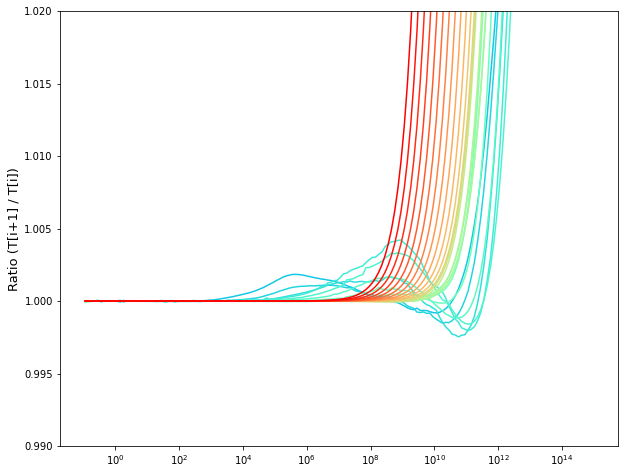

In [339]:
fig, axs = plt.subplots(figsize=(10, 8))

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

plt.xscale("log")
plt.ylim(0.99, 1.02)
plt.ylabel("Ratio (T[i+1] / T[i])", fontsize=13)

colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
i = 10
while i <= (len(xi)-1):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        plt.plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        plt.plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])
    i += 1

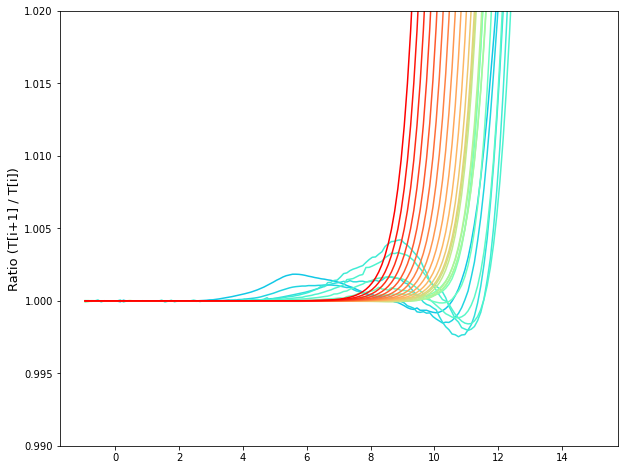

In [353]:
fig, axs = plt.subplots(figsize=(10, 8))

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

#plt.xscale("log")
plt.ylim(0.99, 1.02)
plt.ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 10
while i <= (len(xi)-1):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        plt.plot(
            np.log10(hden_ratio),
            T_ratio[i],
            color=colors[i])
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        plt.plot(
            np.log10(hden_ratio)[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])
    i += 1

In [150]:
index_ratio = np.argmin(T_ratio[10])
min_locations = np.where(T_ratio[10]==T_ratio[10][index_ratio])
transition_location = np.max(min_locations) # the highest index of a minmum point means it's right-most
n_transition_new = hden_ratio[transition_location] # this is the value of transition density! 

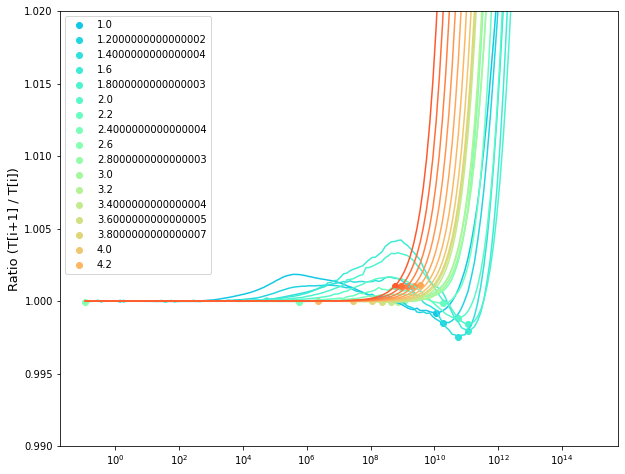

In [250]:
fig, axs = plt.subplots(figsize=(10, 8))

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

plt.xscale("log")
plt.ylim(0.99, 1.02)
plt.ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 10 #17
while i <= (len(xi)-increment):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]): # low xi values
        index_ratio = np.argmin(T_ratio[i])
        min_locations = np.where(T_ratio[i]==T_ratio[i][index_ratio])
        transition_location = np.max(min_locations) # the highest index of a minmum point means it's right-most
        n_transition_new = hden_ratio[transition_location] # this is the value of transition density!
        
        plt.plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])
        plt.scatter(hden_ratio[transition_location],T_ratio[i][transition_location], color=colors[i], label=str(xi_lin[i]))   
        
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        #index_ratio = np.argmin(T_ratio[i][0 : else_i[0]])
        #min_locations = np.where(T_ratio[i][0 : else_i[0]]==T_ratio[i][0 : else_i[0]][index_ratio])
        a, = np.where(T_ratio[i][0 : else_i[0]]>.9999) and np.where(T_ratio[i][0 : else_i[0]]<1.001)
        transition_location = int((a[-1]+1))
        #T_ratio[i][int(a[50]+1)]
        
        #transition_location = np.max(min_locations) # the highest index of a minmum point means it's right-most
        n_transition_new = hden_ratio[transition_location] # this is the value of transition density!
        #print(i, a)
        plt.plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])
        #plt.scatter(hden_ratio[transition_location],T_ratio[i][transition_location])   
        plt.scatter(hden_ratio[transition_location],T_ratio[i][transition_location], color=colors[i])   
        
    i += 1
plt.legend()

0.9991778526278621 110
0.9984738822736734 112
0.9975238810057244 117
0.9979588171752349 120
0.9984111041713338 120
0.998826975019124 117
0.9998538223156389 112


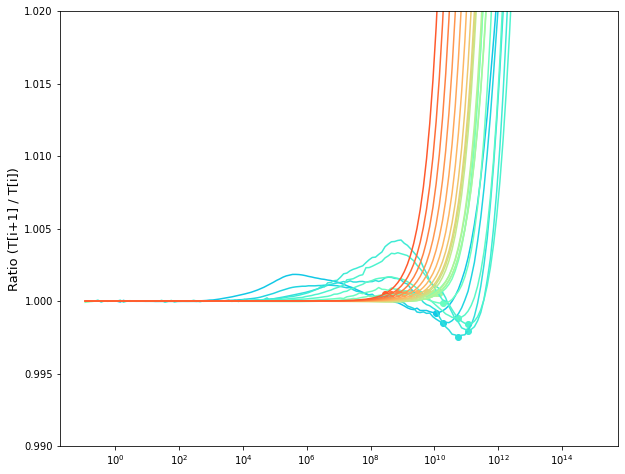

In [262]:
fig, axs = plt.subplots(figsize=(10, 8))

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

plt.xscale("log")
plt.ylim(0.99, 1.02)
plt.ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
i = 10 #17
while i <= (len(xi)-increment):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]): # low xi values
        #index_ratio = np.argmin(T_ratio[i])
        #min_locations = np.where(T_ratio[i]==T_ratio[i][index_ratio])
        #transition_location = np.max(min_locations) # the highest index of a minmum point means it's right-most
        #n_transition_new = hden_ratio[transition_location] # this is the value of transition density!
        #a, = np.where(T_ratio[i]>.9999) and np.where(T_ratio[i]<1.001)
        if np.min(T_ratio[i]) < .9999:
            print(np.min(T_ratio[i]), np.argmin(T_ratio[i]))
            transition_location = np.argmin(T_ratio[i])  
        else:        
            a, = np.where(T_ratio[i]>.9999) and np.where(T_ratio[i]<1.0005)
            #index_ratio = np.argmin(T_ratio[i][a])
            transition_location = int((a[-1]+1))
        plt.scatter(hden_ratio[transition_location],T_ratio[i][transition_location], color=colors[i])   
        plt.plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])
        #plt.scatter(hden_ratio[transition_location],T_ratio[i][transition_location], color=colors[i])   
        
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        #index_ratio = np.argmin(T_ratio[i][0 : else_i[0]])
        #min_locations = np.where(T_ratio[i][0 : else_i[0]]==T_ratio[i][0 : else_i[0]][index_ratio])
        a, = np.where(T_ratio[i][0 : else_i[0]]>.9999) and np.where(T_ratio[i][0 : else_i[0]]<1.0005)
        transition_location = int((a[-1]+1))
        #T_ratio[i][int(a[50]+1)]
        
        #transition_location = np.max(min_locations) # the highest index of a minmum point means it's right-most
        n_transition_new = hden_ratio[transition_location] # this is the value of transition density!
        #print(i, a)
        plt.plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])
        #plt.scatter(hden_ratio[transition_location],T_ratio[i][transition_location])   
        plt.scatter(hden_ratio[transition_location],T_ratio[i][transition_location], color=colors[i])   
        
    i += 1

In [ ]:
a, = np.where(T_ratio[i]<.999) or np.where(T_ratio[i]>1.001)
        index_ratio = np.argmin(T_ratio[i][a])
        transition_location = int((a[-1]+1))

In [230]:
a, = np.where(T_ratio[30]<.999) or np.where(T_ratio[30]>1.001)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


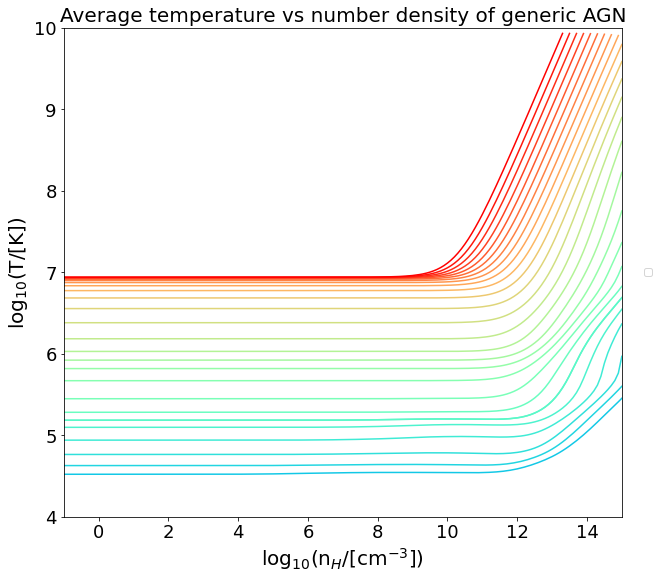

In [312]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title('Average temperature vs number density of generic AGN', fontsize=20)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=20)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=20)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
plt.xlim(-1, 15)
plt.ylim(4, 10)
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(10, len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if i == 15:
        #print(i)
        plt.plot(hden_lin, np.log10(row), color=colors[i])#, label="log($\\xi$)= " + str(xi_lin[i]))

    
    if len(index) == len(row):
        pass
        plt.plot(hden_lin, np.log10(row), color=colors[i])#, label="log($\\xi$)= " + str(xi_lin[i]))
    else:
        pass
        plt.plot(hden_lin[index], np.log10(row)[index], color=colors[i])#, label="log($\\xi$)= " + str(xi_lin[i]))

#plt.plot(n_transition,te_transition, color=colors, marker='o') 
#plt.plot(hden_lin[70], np.log10(np.array(avg_temp_split_list[15][70])), marker='o', markersize=10)
#plt.plot(hden_lin[130], np.log10(np.array(avg_temp_split_list[15][130])), marker='o', markersize=10)
#plt.plot(hden_lin[150], np.log10(np.array(avg_temp_split_list[15][150])), marker='o', markersize=10)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

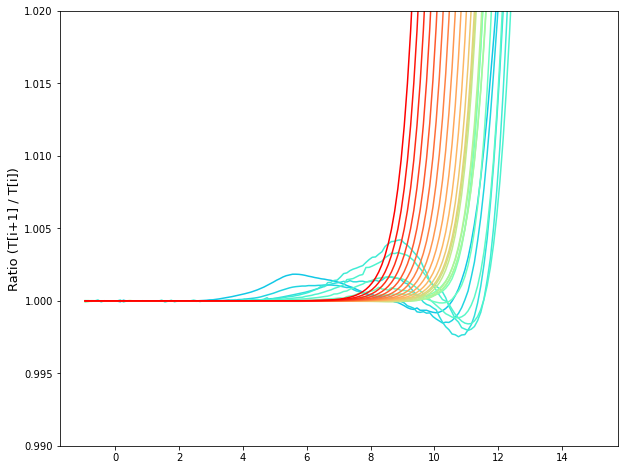

In [354]:
fig, axs = plt.subplots(figsize=(10, 8))

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

#plt.xscale("log")
plt.ylim(0.99, 1.02)
plt.ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))

i = 10
while i <= (len(xi)-1):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        plt.plot(
            np.log10(hden_ratio),
            T_ratio[i],
            color=colors[i])
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        plt.plot(
            np.log10(hden_ratio)[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])
    i += 1

Text(3.0, 9.439778803274496, 'log($\\xi$)=6')

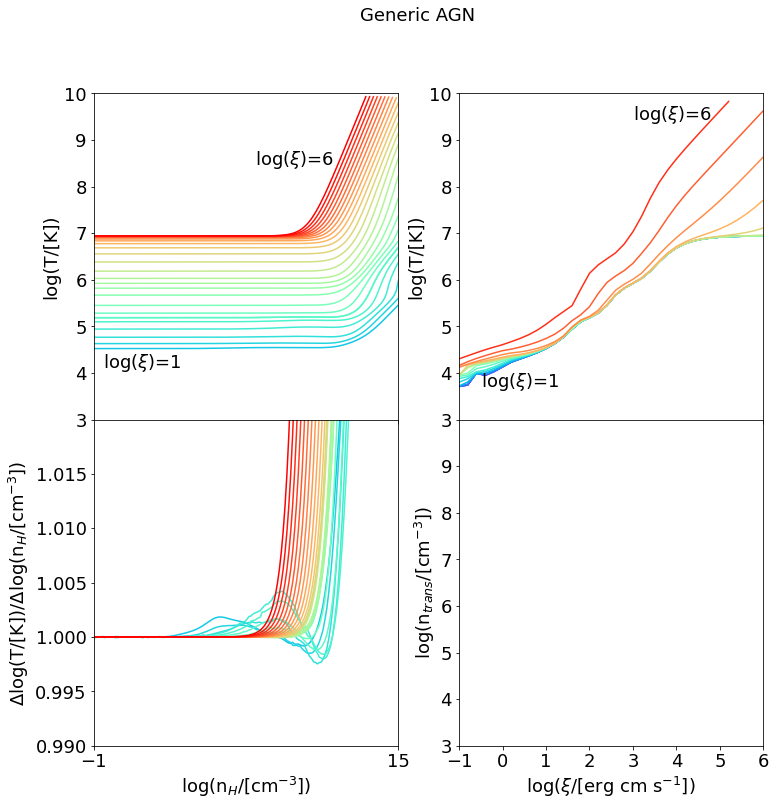

In [93]:
fig, axs = plt.subplots(2, 2, sharex='col', figsize=(12, 12))
fig.subplots_adjust(hspace=0)
fig.suptitle('Generic AGN', fontsize=18)
# Left panel
axs[0, 0].set_ylabel(r'log(T/[K])', fontsize=18)
axs[0, 0].tick_params(axis='x', labelsize= 18) 
axs[0, 0].tick_params(axis='y', labelsize= 18)
axs[0, 0].set_xlim(-1, 15)
axs[0, 0].set_ylim(3, 10)

colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_list)))
for i in range(10, len(xi)):
    row = np.array(avg_temp_split_list[i])
    index, = np.where(row != 1e-30)
    if i == 15:
        axs[0, 0].plot(hden_lin, np.log10(row), color=colors[i])#, label="log($\\xi$)= " + str(xi_lin[i]))

    if len(index) == len(row):
        axs[0, 0].plot(hden_lin, np.log10(row), color=colors[i])#, label="log($\\xi$)= " + str(xi_lin[i]))
    else:
        axs[0, 0].plot(hden_lin[index], np.log10(row)[index], color=colors[i])#, label="log($\\xi$)= " + str(xi_lin[i]))

axs[1, 0].tick_params(axis='x', labelsize= 18) 
axs[1, 0].tick_params(axis='y', labelsize= 18) 
axs[1, 0].set_xticks([-1, 15])
axs[1, 0].set_xlim(-1, 15)
axs[1, 0].set_ylim(0.99, 1.02)
axs[1, 0].set_yticks([0.990, 0.995, 1, 1.005, 1.01, 1.015])
axs[1, 0].set_xlabel(r'log(n$_H$/[cm$^{-3}$])', fontsize=18)
axs[1, 0].set_ylabel(r'$\Delta$log(T/[K])/$\Delta$log(n$_H$/[cm$^{-3}$])', fontsize=18)

T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
i = 10
while i <= (len(xi)-1):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        axs[1, 0].plot(
            np.log10(hden_ratio),
            T_ratio[i],
            color=colors[i])
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        axs[1, 0].plot(
            np.log10(hden_ratio)[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])
    i += 1


# Right panel
axs[0, 1].set_ylabel(r'log(T/[K])', fontsize=18)
axs[0, 1].tick_params(axis='x', labelsize= 18) 
axs[0, 1].tick_params(axis='y', labelsize= 18)
axs[0, 1].set_xticks([-1, 15])
axs[0, 1].set_xlim(-1, 15)
axs[0, 1].set_ylim(3, 10)

i = 0
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr)))
while i < (len(hden)-1):
    row = np.array(avg_temp_2darr[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        axs[0, 1].plot(xi_lin, np.log10(row), color=colors[i])#, label="n_h=10^" + str(hden_lin[i]) + ' (all)')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        axs[0, 1].plot(
            xi_lin[0:end],
            np.log10(row)[0:end],
            color=colors[i],
        )
    i += 10

axs[1, 1].set_xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
axs[1, 1].set_ylabel(r'log(n$_{trans}$/[cm$^{-3}$])', fontsize=18)
axs[1, 1].tick_params(axis='x', labelsize= 18) 
axs[1, 1].tick_params(axis='y', labelsize= 18) 
axs[1, 1].set_xticks([-1, 0, 1, 2, 3, 4, 5, 6])
axs[1, 1].set_yticks([3, 4, 5, 6, 7, 8, 9])
axs[1, 1].set_xlim(-1, 6)
axs[1, 1].set_ylim(3, 10)

axs[0, 0].text(hden_lin[0]+.5, np.log10(avg_temp_split_list[0][20])+.4, 'log($\\xi$)=1', fontsize=18)
axs[0, 0].text(hden_lin[85], np.log10(avg_temp_split_list[0][-1])+4, 'log($\\xi$)=6', fontsize=18)  


axs[0, 1].text(xi_lin[0]+.5, np.log10(avg_temp_2darr[0][0]), 'log($\\xi$)=1', fontsize=18)
axs[0, 1].text(xi_lin[-1]-3, np.log10(avg_temp_2darr[0][-1])+2.5, 'log($\\xi$)=6', fontsize=18)  

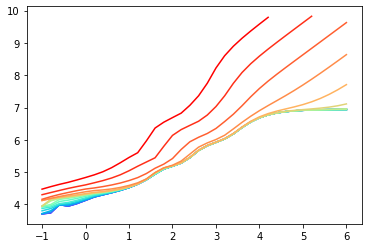

In [46]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr)))
#for i in range(len(hden)):
i = 0
while i < len(hden):
    row = np.array(avg_temp_2darr[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin, np.log10(row), color=colors[i], label="n_h=10^" + str(hden_lin[i]) + ' (all)')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin[0:end],
            np.log10(row)[0:end],
            color=colors[i],
            label="n_h=10^" + str(hden_lin[i]) + ' (all)',
        )
    i += 10

In [43]:
def temp_vs_xi(
    xi, hden, hden_lin, avg_temp_2darr, prefix
):
    fig, ax = plt.subplots(figsize=(10, 9))
    plt.title(
        "average temp $T_{avg} $ vs ionization number $\chi$ (" + str(prefix) + ")",
        fontsize=14,
    )
    plt.xlabel("ionization parameter $\chi$", fontsize=13)
    plt.ylabel("$T_{avg} [K]$", fontsize=13)
    plt.xscale("log")
    plt.yscale("log")
    colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr)))
    #for i in range(len(hden)):
    i = 0
    while i < len(hden):
        row = np.array(avg_temp_2darr[i])
        (index,) = np.where(row != 1e-30)
        if len(index) == len(row):  # == 1e-30 does NOT exist
            plt.plot(xi, row, color=colors[i], label="n_h=10^" + str(hden_lin[i]) + ' (all)')
        else:
            (i_1e30,) = np.where(row == 1e-30)
            end = i_1e30[0]
            plt.plot(
                xi[0:end],
                row[0:end],
                color=colors[i],
                label="n_h=10^" + str(hden_lin[i]) + ' (all)',
            )
        i += 10
    return ax

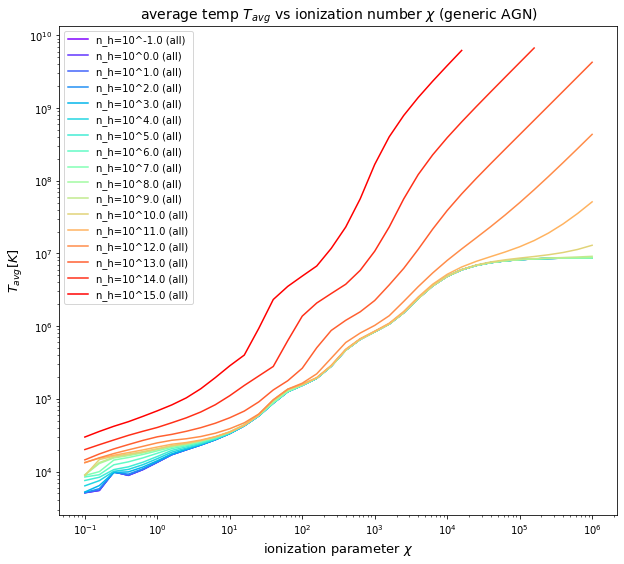

In [44]:
temp_vs_xi(
    xi, hden, hden_lin, avg_temp_2darr, prefix
)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


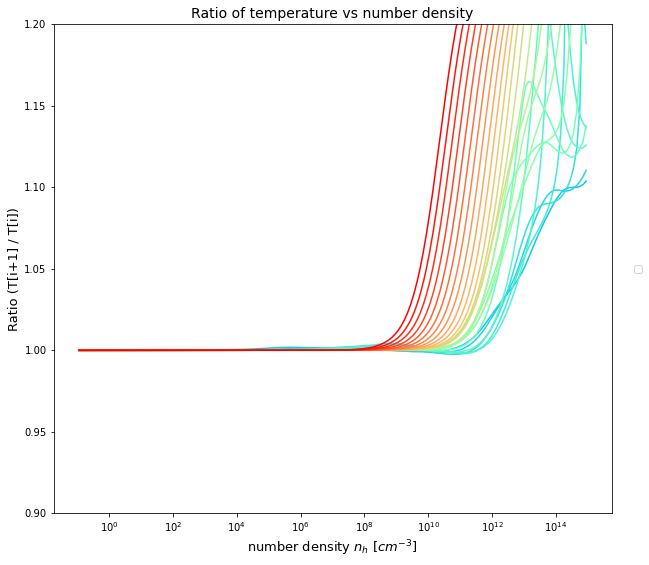

In [78]:
T_ratio = np.exp(np.diff(np.log(avg_temp_split_list)))
hden_ratio = (hden[1:] + hden[:-1]) / 2

fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Ratio of temperature vs number density", fontsize=14)
plt.xlabel("number density $n_h$ [$cm^{-3}$]", fontsize=13)
plt.ylabel("Ratio (T[i+1] / T[i])", fontsize=13)
plt.xscale("log")
plt.ylim(0.9, 1.2)
# plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
increment = int(1/xi_stepsize)
#i = 0
#while i <= (len(xi)-increment):
for i in range(10, len(xi)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len(ratio_i) == len(T_ratio[i]):
        plt.plot(
            hden_ratio,
            T_ratio[i],
            color=colors[i])
    else:
        (else_i,) = np.where(T_ratio[i] < 1e-39)
        plt.plot(
            hden_ratio[0 : else_i[0]],
            T_ratio[i][0 : else_i[0]],
            color=colors[i])#,
       #     label="xi=10^" + str("%.2f" % xi_lin[i]) + " (all)",

    #i += 1
#plt.plot(hden_ratio, T_ratio[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

In [77]:
def AvgTemp_vs_n(hden, xi, xi_lin, avg_temp_split_stacked, n_transition_stacked, Te_transition_stacked, name_index):
    fig, ax = plt.subplots(figsize=(10, 9))
    plt.title('Average temperature vs number density of Mrk509', fontsize=14)
    plt.xlabel('log(number density $n_h$) [$cm^{-3}$]', fontsize=13)
    plt.ylabel('$T_{avg} [K]$', fontsize=13)
    plt.xscale('log')
    plt.yscale('log')

    colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
    xi_stepsize = np.abs(xi_lin[0]-xi_lin[1])
    increment = int(1/xi_stepsize)
    i = 0
    while i <= (len(xi)-increment):
        row = avg_temp_split_stacked[i]
        index, = np.where(row != 1e-30)

        if len(index) == len(row):
            plt.plot(hden, row, color=colors[i])#, label= 'xi='  + str(i-1) + ' (' + str(name_index[0]) + ')')   
        else:
            i_1e30, = np.where(row == 1e-30)
            print(i_1e30, i)
            end = i_1e30[0]
            plt.plot(hden[index], row[0:end], color=colors[i])#, label= 'xi=' + str(i-1) + ' (' + str(name_index[0]) + ')')   
        plt.scatter(n_transition_stacked[0], Te_transition_stacked[0], color=colors[i], marker='*', s=160)#, label='all')
        i += increment

    plt.scatter(n_transition_stacked[0], Te_transition_stacked[0], color=colors[0], marker='*', s=160, label= ' (' + str(name_index[0]) + ')')  
    plt.plot(hden, avg_temp_split_stacked[0], color=colors[0], label= ' (' + str(name_index[0]) + ')')   
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    return ax

In [213]:
for index in range(0, len(avg_temp_split_list)):
    for i in range(0, len(avg_temp_split_list[0])-1):
        if avg_temp_split_list[index][i + 1] / avg_temp_split_list[index][i] * 100 >= 110.0:
            n_transition = np.append(n_transition, hden[i])
            te_transition = np.append(te_transition, avg_temp_split_list[index][i])
            break

In [274]:
name_index  = {0:'all region', 1:'intermediate', 2:'no IR'}

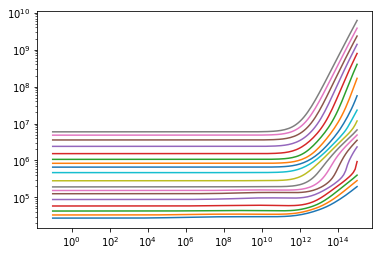

In [137]:
plt.xscale('log')
plt.yscale('log')
for i in range(18):
    plt.plot(hden, listOfLists[i])#, label='a')
    plt.plot

In [48]:
avg_temp_split = np.append(a, b)

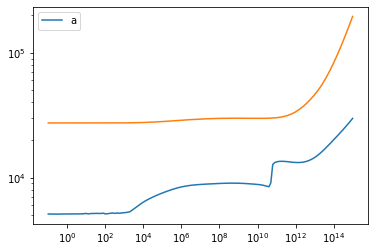

In [60]:
plt.yscale('log')
plt.xscale('log')
plt.plot(hden, avg_temp_split1[0], label='a')
plt.plot(hden, avg_temp_split2[0])
plt.legend()